In [124]:
pip install pandas scikit-learn matplotlib seaborn jupyter scipy numpy fastai

Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image, display_svg, SVG
import seaborn as sns
import dtreeviz
# from fastbook import draw_tree

pd.options.display.max_rows = 40
pd.options.display.max_columns = 40

In [126]:
df = pd.read_csv('../input/home-data-for-ml-course/train.csv')
dft = pd.read_csv('../input/home-data-for-ml-course/test.csv')

In [127]:
columns = df.columns.tolist()

nan_row = {col: np.nan for col in columns}

# Convert to DataFrame
df_nan = pd.DataFrame([nan_row])
df_nan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df = pd.concat([df,df_nan]).reset_index(drop=True)

In [129]:
df= df.drop(columns=['Id'])

In [130]:
df.loc[df.YrSold.isna(),'YrSold'] = 2008

In [131]:
dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

<Axes: xlabel='YrSold', ylabel='count'>

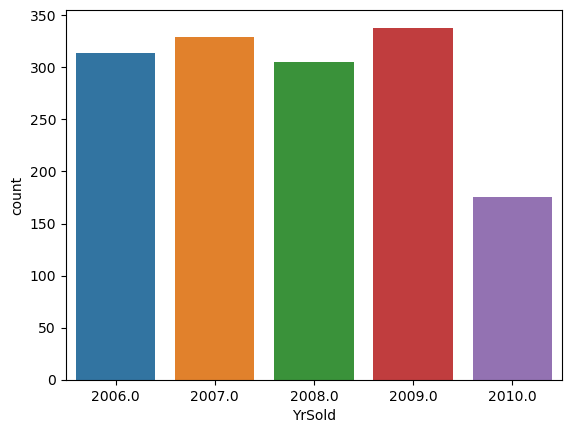

In [132]:
sns.countplot(df, x='YrSold')

In [133]:
cond = (df.YrSold<2010)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
# 
splits = (list(train_idx),list(valid_idx))

In [134]:
procs = [Categorify, FillMissing]
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [135]:
to.items

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GrLivArea_na,BsmtFullBath_na,BsmtHalfBath_na,FullBath_na,HalfBath_na,BedroomAbvGr_na,KitchenAbvGr_na,TotRmsAbvGrd_na,Fireplaces_na,GarageYrBlt_na,GarageCars_na,GarageArea_na,WoodDeckSF_na,OpenPorchSF_na,EnclosedPorch_na,3SsnPorch_na,ScreenPorch_na,PoolArea_na,MiscVal_na,MoSold_na
0,60.0,4,65.0,8450.0,2,0,4,4,1,5,1,6,3,3,1,6,7.0,5.0,2003.0,2003.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,20.0,4,80.0,9600.0,2,0,4,4,1,3,1,25,2,3,1,3,6.0,8.0,1976.0,1976.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,60.0,4,68.0,11250.0,2,0,1,4,1,5,1,6,3,3,1,6,7.0,5.0,2001.0,2002.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,70.0,4,60.0,9550.0,2,0,1,4,1,1,1,7,3,3,1,6,7.0,5.0,1915.0,1970.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,60.0,4,84.0,14260.0,2,0,1,4,1,3,1,16,3,3,1,6,8.0,5.0,2000.0,2000.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,20.0,5,90.0,7407.0,2,0,4,4,1,5,1,18,1,3,1,3,6.0,7.0,1957.0,1996.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1446,20.0,4,69.0,26142.0,2,0,1,4,1,2,1,12,3,3,1,3,5.0,7.0,1962.0,1962.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1456,20.0,4,85.0,13175.0,2,0,4,4,1,5,1,15,3,3,1,3,6.0,6.0,1978.0,1988.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1457,70.0,4,66.0,9042.0,2,0,4,4,1,5,1,7,3,3,1,6,7.0,9.0,1941.0,2006.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [136]:
len(to.train),len(to.valid)

(1286, 175)

In [137]:
to.items = to.items.drop(index=1460)

## Creating a Decision Tree Model

In [138]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [139]:
m = DecisionTreeRegressor(max_leaf_nodes=7)
m.fit(xs, y);

In [140]:
viz_model = dtreeviz.model(m,
                           X_train=xs, y_train=y,
                           feature_names=xs.columns,
                           target_name=dep_var)

v = viz_model.view(fontname="monospace")
v.show()

C:\Users\cynthia\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

In [ ]:
def log_r_mse(pred,y):
    return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y):
    return log_r_mse(np.log(m.predict(xs)), np.log(y))

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=5)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y), m.get_n_leaves()

In [ ]:
def get_tree(X, y, prop=0.75, min_leaf=5, max_leaf=None): 
    n = len(y)
    # idxs = random.choice(n, int(n*prop))
    idxs = np.random.choice(n, int(n*prop), replace=False)

    return DecisionTreeRegressor(min_samples_leaf=min_leaf, max_leaf_nodes=max_leaf).fit(X.iloc[idxs], y.iloc[idxs])

In [ ]:
trees = [get_tree(xs, y, max_leaf=None) for t in range(100)]

In [ ]:
all_probs = [t.predict(valid_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)


In [ ]:
np.log(avg_probs)[:6]

In [ ]:
rmse = math.sqrt(mean_squared_error(np.log(valid_y), np.log(avg_probs)))
r2 = r2_score(valid_y, avg_probs)

print('Root Mean Squared Error:', rmse)
print("R-squared:", r2)

## 4. Feature Importance and Hyperparameter Tuning

In [ ]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image, display_svg, SVG
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import dtreeviz
import optuna

pd.options.display.max_rows = 40
pd.options.display.max_columns = 40

In [ ]:
df = pd.read_csv('../input/home-data-for-ml-course/train.csv')
dft = pd.read_csv('../input/home-data-for-ml-course/test.csv')

columns = df.columns.tolist()

nan_row = {col: np.nan for col in columns}

# Convert to DataFrame
df_nan = pd.DataFrame([nan_row])

df = pd.concat([df,df_nan]).reset_index(drop=True)
df = df.drop(columns=['Id'])
df.loc[df.YrSold.isna(),'YrSold'] = 2008.

dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

cond = (df.YrSold<2010)

train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [ ]:
procs = [Categorify, FillMissing]
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)
to.items = to.items.drop(index=1460)

In [ ]:
xs, y = to.train.xs,to.train.y
valid_xs, valid_y = to.valid.xs,to.valid.y

In [ ]:
def r_mse(pred,y):
    return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y):
    return r_mse(m.predict(xs), y)

## Create a Random Forest Model

In [ ]:
model = RandomForestRegressor()
model.fit(xs, y)
m_rmse(model, xs, y), m_rmse(model, valid_xs, valid_y), r2_score(valid_y, model.predict(valid_xs))

In [ ]:
importances = model.feature_importances_
feature_names = xs.columns
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model, valid_xs, valid_y, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)


In [ ]:
sorted_importances = forest_importances.sort_values(ascending=False)
importances_std = pd.Series(result.importances_std, index=feature_names)
sorted_importances_std = importances_std[sorted_importances.index]

In [ ]:
fig, ax = plt.subplots()
keep = 10
sorted_importances[:keep].plot.bar(yerr=sorted_importances_std[:keep], ax=ax)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# Hyperparameter optimization of RandomForestRegressor

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 1, 200)
    # max_depth = trial.suggest_int("max_depth", 3, 30)
    # min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    # min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    # max_features = trial.suggest_categorical("max_features", [1])

    # Create and evaluate the model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        # max_depth=max_depth,
        # min_samples_split=min_samples_split,
        # min_samples_leaf=min_samples_leaf,
        # max_features=max_features,
        random_state=42,
        n_jobs=-1
    )
    
    # Use cross-validation to evaluate the model
    # score = cross_val_score(model, xs, y, cv=5, scoring=m_rmse)
    model.fit(xs, y)
    score = m_rmse(model, valid_xs, valid_y)
    # return np.mean(score)  # Optuna minimizes, so negative MSE
    return score

# Run the optimization
# sampler=optuna.samplers.GPSampler()
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, n_jobs=1)

# Print best parameters
print("Best parameters found:", study.best_params)

# Train final model with best parameters
best_params = study.best_params
final_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
final_model.fit(xs, y)

# Evaluate on test set
test_score = final_model.score(valid_xs, valid_y)
rmse_result = m_rmse(final_model, valid_xs, valid_y)
print("Test RMSE Score:", rmse_result)
print("Test R^2 Score:", test_score)
